In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
data = pd.read_excel("aug_train.xlsx")
data.sample(6)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19088,25566,city_46,0.762,Male,Has relevent experience,no_enrollment,Masters,STEM,17,100-500,Pvt Ltd,2,18,0
3787,3613,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,14,<10,Funded Startup,1,42,0
12875,3454,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Public Sector,3,196,0
18271,24967,city_136,0.897,NaN,No relevent experience,no_enrollment,Masters,STEM,1,<10,Funded Startup,1,16,1
16870,5865,city_102,0.804,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,2,2,0
4187,7143,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,No Major,4,100-500,Pvt Ltd,1,17,0


In [3]:
data.info()#banyak data yang kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [4]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column: enrollee_id	 percent of NaN value: 0.00%
column:       city	 percent of NaN value: 0.00%
column: city_development_index	 percent of NaN value: 0.00%
column:     gender	 percent of NaN value: 23.53%
column: relevent_experience	 percent of NaN value: 0.00%
column: enrolled_university	 percent of NaN value: 2.01%
column: education_level	 percent of NaN value: 2.40%
column: major_discipline	 percent of NaN value: 14.68%
column: experience	 percent of NaN value: 0.34%
column: company_size	 percent of NaN value: 30.99%
column: company_type	 percent of NaN value: 32.05%
column: last_new_job	 percent of NaN value: 2.21%
column: training_hours	 percent of NaN value: 0.00%
column:     target	 percent of NaN value: 0.00%


In [6]:
data['city'].unique() 

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

kita perlu menghapus variable id dan city karena terlalu banyak nilai unique



In [7]:
#menghapus kolom yang banyak unique dan ambigu pada company size
data.drop(['enrollee_id','city', 'company_size'], axis=1, inplace=True)

In [8]:
cat = ['gender','relevent_experience', 'enrolled_university', 'education_level','major_discipline', 'company_type','experience',
       'last_new_job']
num = ['city_development_index','training_hours', 'target']

In [9]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('gold', as_cmap=True))

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


1. Indeks perkembangan kota rata-rata 0.828 dengan median 0.9 dan ini kemungkinan skew nya minim
2.  rata-rata pelatihan selesai 65 jam dengan median 47 jam sehingga kemungkinan skew nya cukup besar
3. rata-rata  Tidak mencari perubahan pekerjaan

In [10]:
data[cat].describe()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,last_new_job
count,14650,19158,18772,18698,16345,13018,19093,18735
unique,3,2,3,5,6,6,22,6
top,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd,>20,1
freq,13221,13792,13817,11598,14492,9817,3286,8040


1. gender seperti ada keanehan karena terdapat 3 jenis gender, dengan mayoritas pria
2. mayoritas kandidat Pengalaman yang relevan dengan pekerjaan
3. mayoritas tidak memiliki kursus khusus bagi si kandidat
4. Tingkat pendidikan calon mayoritas sudah lulus
5. Pendidikan disiplin utama calon mayoritas STEM
6. mayoritas pengalaman lebih dari 20 tahun
7. Jumlah karyawan di perusahaan pemberi kerja saat ini 50-99 karyawan
8. mayoritas kandidat bekerja di Pvt Ltd
9. Perbedaan tahun antara pekerjaan sebelumnya dan pekerjaan saat ini mayoritas 1 tahun

In [11]:
for col in cat: #berikut adalah sebaran nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

Value count kolom company_type:
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other 

In [12]:
for i in range(len(data.index)):
  if data['experience'][i] == '>20':
    data['experience'][i] = '21'
  elif data['experience'][i] == '<1':
    data['experience'][i] = '0'

In [13]:
for i in range(len(data.index)):
  if data['last_new_job'][i] == '>4':
    data['last_new_job'][i] = '5'
  elif data['last_new_job'][i] == 'never':
    data['last_new_job'][i] = '0'

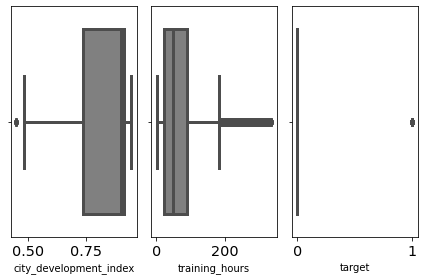

In [14]:
#UNIVARIATE ANALYSIS : untuk analysis satu variable sehingga dapat melihat karakteristiknya
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='grey', orient='h')
    plt.tight_layout()

kolom city development dan training hours terdapat outlier 

<Figure size 864x360 with 0 Axes>

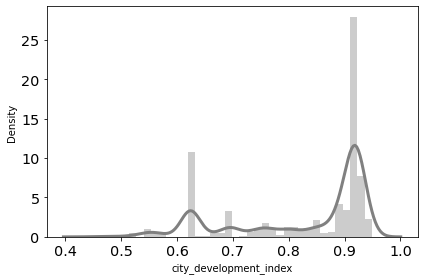

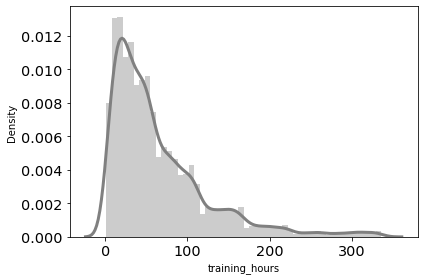

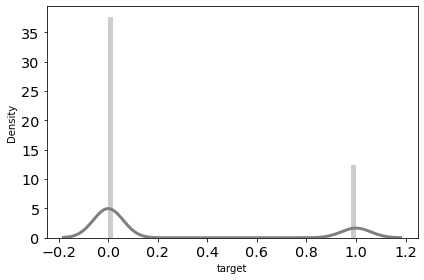

In [15]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(data[num[i]], color='grey')
    plt.tight_layout() #sepertinya variable city development dan training hours memiliki skew

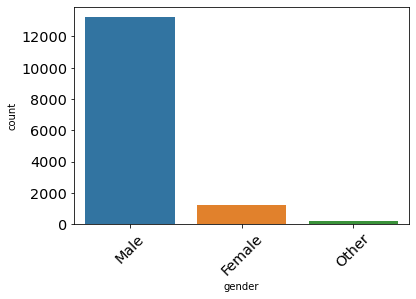

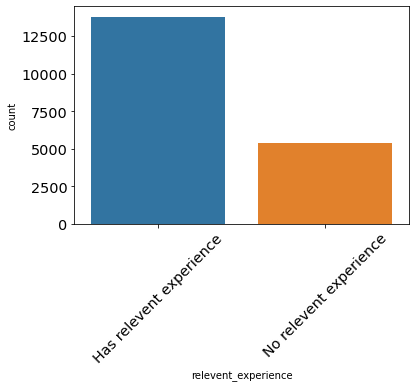

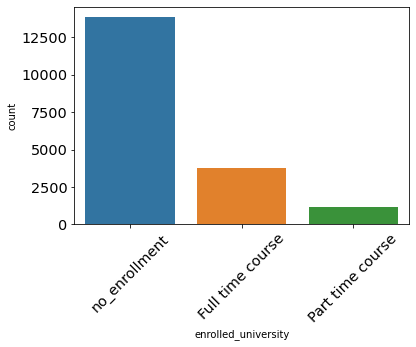

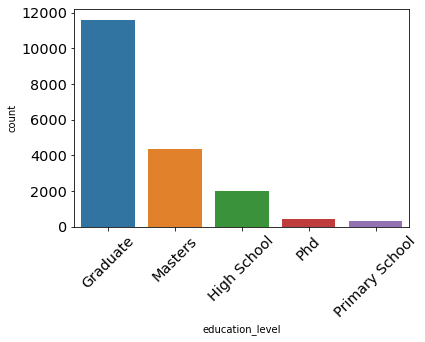

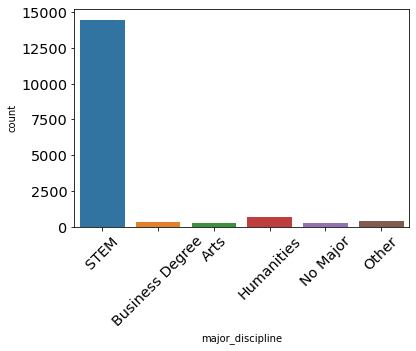

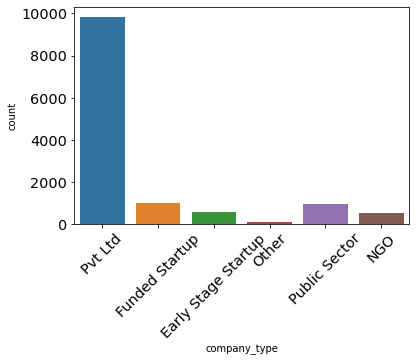

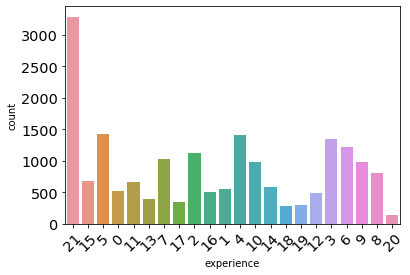

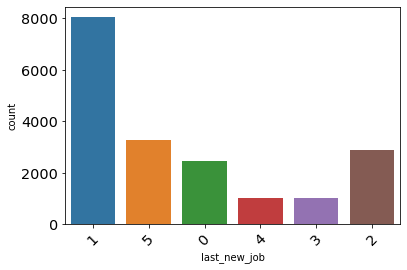

In [16]:
for i in data[cat].columns: #visualisasi univariate sebaran nilai per variable
    sns.countplot(data[i])
    plt.xticks(rotation = 45)
    plt.show()

In [17]:
print("Skew: {}".format(data[num].skew())) #cek nilai skew

Skew: city_development_index   -0.995428
training_hours            1.819237
target                    1.158815
dtype: float64


In [18]:
#CLEANING DATA
data.dropna(subset=['enrolled_university'], inplace=True)
data.dropna(subset=['education_level'], inplace=True)
data.dropna(subset=['experience'], inplace=True)
data.dropna(subset=['last_new_job'], inplace=True)

In [19]:
data['major_discipline'].fillna(data['major_discipline'].mode()[0], inplace=True)

In [20]:
missing_data_object_column=[i for i in data.columns if data[i].isnull().sum()>=0 and data[i].dtype=='O']
missing_categorical_data = missing_data_object_column
def removing_missing_value(data): #menghapus missing value untuk numerikal dan kategorikal data sesuai dengan keadaan skew
    for col in missing_categorical_data:
        data[col].fillna(method='ffill',inplace=True)
removing_missing_value(data)  

In [21]:
print(data.duplicated().sum())#cek duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

326
0


In [22]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')
## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in num:
    zscore = abs(stats.zscore(data[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 17688
3.128209789982918
4.478865568495507
1.7433526247027602
Jumlah baris setelah memfilter outlier: 17263


In [23]:
data1.isnull().sum()#kita perlu curiga karena sudah dilakukan fill dan drop tetapi masih ada nilai null

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              1
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [24]:
data1['company_type'].unique()#cek unique dan ada isi nan

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [25]:
data1.dropna(inplace=True)#hapus nan

In [26]:
data1.isnull().sum()#data sudah bersih

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [27]:
retarget = {0: 'tidak mencari kerja',1: 'mencari kerja'}
data1['target'] = data1['target'].map(retarget)

In [28]:
#EDA VISUALIZATION
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
target = data1.groupby('target').agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.pie(target, values = 'count', names = 'target')
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.5, 
                  marker = dict(colors = ['navy','red'], line = dict(color = 'gold', width = 2)))

fig.update_layout(title_text = 'pencari kerja', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Calibri Black', title_font_color = 'black',
                  showlegend = False)           
fig.show()

terlihat kandidat yang ingin mencari perubahan kerja lebih sedikit daripada yang tidak ingin melakukan perubahan pekerjaannya. dan data terlihat imbalance data

In [27]:
gender = data1.groupby(['gender', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
experience = data1.groupby(['relevent_experience', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
education_level = data1.groupby(['education_level', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
enrolled = data1.groupby(['enrolled_university', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
major_discipline = data1.groupby(['major_discipline', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
company_type = data1.groupby(['company_type', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

In [28]:
experience#melihat salah satu table groupby yaitu variable experience

,relevent_experience,target,count
0,Has relevent experience,mencari kerja,2678
1,Has relevent experience,tidak mencari kerja,9886
2,No relevent experience,mencari kerja,1604
3,No relevent experience,tidak mencari kerja,3094


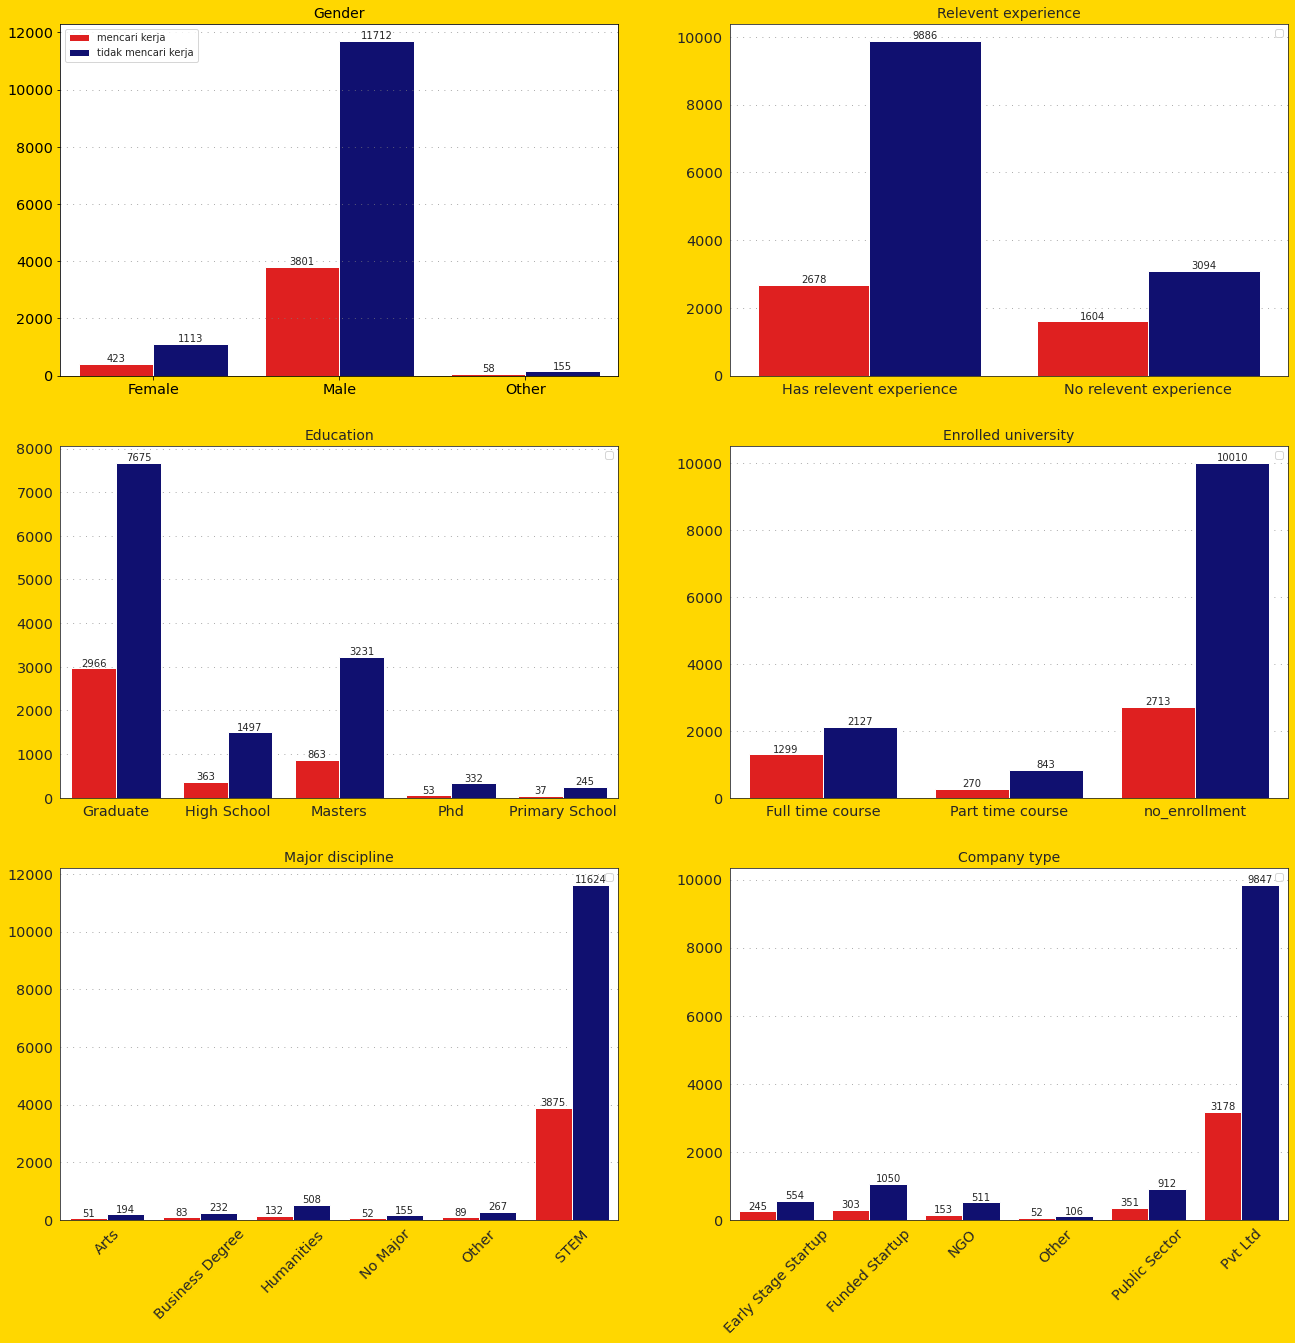

In [29]:
fig = plt.figure(figsize = (22, 22))
fig.patch.set_facecolor('gold')

plt.subplot(321)
sns.set_style('white')
plt.title('Gender', size = 14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a = sns.barplot(data = gender, x = gender['gender'], y = gender['count'], hue = gender['target'], palette = ['red', 'navy'])
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

plt.subplot(322)
plt.title('Relevent experience', size = 14)
a2 = sns.barplot(data = experience, x = experience['relevent_experience'], y = experience['count'], hue = experience['target'], palette = ['red', 'navy'])
for p in a2.patches:
    height = p.get_height()
    a2.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(323)
plt.title('Education', size = 14)
a3 = sns.barplot(data = education_level, x = education_level['education_level'], y = education_level['count'], hue = education_level['target'], palette = ['red', 'navy'])
for p in a3.patches:
    height = p.get_height()
    a3.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(324)
plt.title('Enrolled university', size = 14)
a4 = sns.barplot(data = enrolled, x = enrolled['enrolled_university'], y = enrolled['count'], hue = enrolled['target'], palette = ['red', 'navy'])
for p in a4.patches:
    height = p.get_height()
    a4.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(325)
plt.title('Major discipline', size = 14)
a5 = sns.barplot(data = major_discipline, x = major_discipline['major_discipline'], y = major_discipline['count'], hue = major_discipline['target'], palette = ['red', 'navy'])
for p in a5.patches:
    height = p.get_height()
    a5.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')
plt.xticks(rotation = 45)

plt.subplot(326)
plt.title('Company type', size = 14)
a6 = sns.barplot(data = company_type, x = company_type['company_type'], y = company_type['count'], hue = company_type['target'], palette = ['red', 'navy'])
for p in a6.patches:
    height = p.get_height()
    a6.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')
plt.xticks(rotation = 45)
plt.show()

In [30]:
data1['experience'] = data1['experience'].astype(int)#mengubah tipe data yang seharusnya int
data1['last_new_job'] = data1['last_new_job'].astype(int)

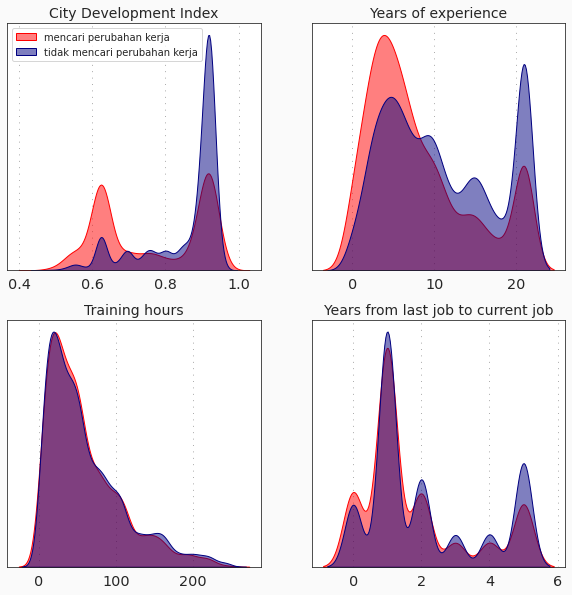

In [31]:
%matplotlib inline
fig = plt.figure(figsize = (10, 10))
fig.patch.set_facecolor('#fafafa')

plt.subplot(221)
sns.set_style('white')
plt.title('City Development Index', size = 14)
sns.kdeplot(data1.query('target == "mencari kerja"')['city_development_index'], color = 'red', shade = True, label = 'mencari perubahan kerja', alpha = 0.5)
sns.kdeplot(data1.query('target == "tidak mencari kerja"')['city_development_index'], color = 'navy', shade = True, label = 'tidak mencari perubahan kerja', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Years of experience', size = 14)
sns.kdeplot(data1.query('target == "mencari kerja"')['experience'], color = 'red', shade = True, label = 'mencari perubahan kerja', alpha = 0.5)
sns.kdeplot(data1.query('target == "tidak mencari kerja"')['experience'], color = 'navy', shade = True, label = 'tidak mencari perubahan kerja', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.subplot(223)
plt.title('Training hours', size = 14)
sns.kdeplot(data1.query('target == "mencari kerja"')['training_hours'], color = 'red', shade = True, label = 'mencari perubahan kerja', alpha = 0.5)
sns.kdeplot(data1.query('target == "tidak mencari kerja"')['training_hours'], color = 'navy', shade = True, label = 'tidak mencari perubahan kerja', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.subplot(224)
plt.title('Years from last job to current job', size = 14)
sns.kdeplot(data1.query('target == "mencari kerja"')['last_new_job'], color = 'red', shade = True, label = 'mencari perubahan kerja', alpha = 0.5)
sns.kdeplot(data1.query('target == "tidak mencari kerja"')['last_new_job'], color = 'navy', shade = True, label = 'tidak mencari perubahan kerja', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.show()

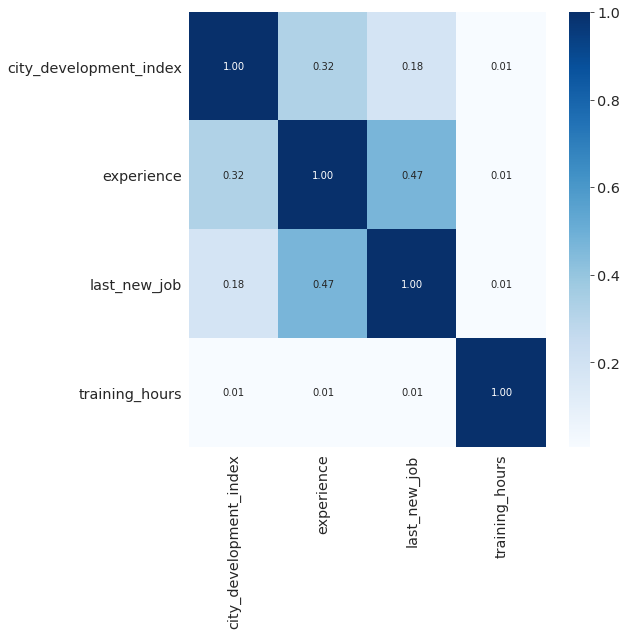

In [32]:
plt.figure(figsize=(8, 8))#tidak ada variable bersifat multikolinearitas
sns.heatmap(data1.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

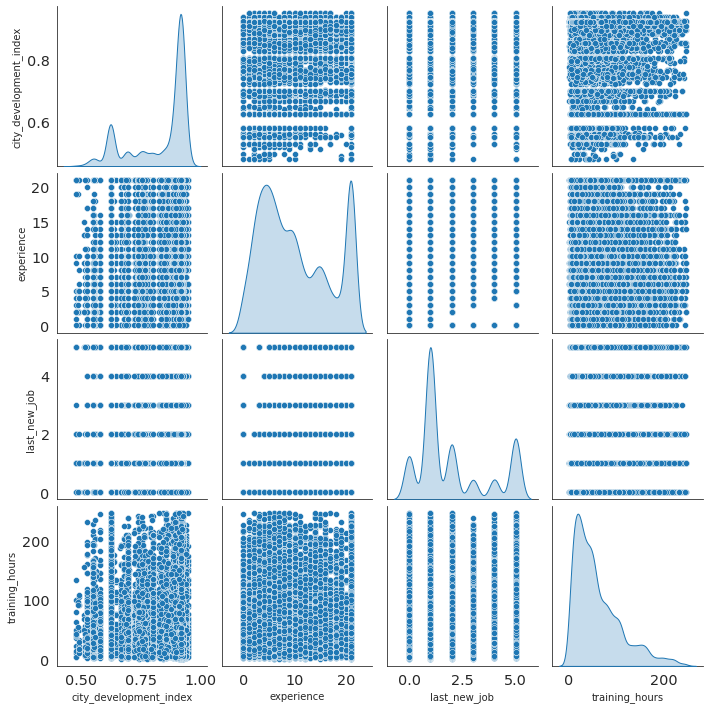

In [68]:
plt.figure(figsize=(15, 15))
sns.pairplot(data1, diag_kind='kde')

In [33]:
retarget2 = {'tidak mencari kerja': 0, 'mencari kerja': 1}
data1['target'] = data1['target'].map(retarget2)

In [34]:
#melakukan encoding pada tipe data string
data2=pd.get_dummies(data1[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type']])
data2.head()

,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [35]:
data3 = pd.concat([data1,data2], axis=1)#menggabungkan 2 dataframe
data3.tail()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Funded Startup,1,42,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Funded Startup,4,52,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Pvt Ltd,4,44,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,Pvt Ltd,2,97,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
19157,0.855,Male,No relevent experience,no_enrollment,Primary School,STEM,2,Pvt Ltd,1,127,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [36]:
data3.drop(['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type'], axis=1, inplace=True)

In [39]:
X = data3.drop(['target'], axis = 1)
y = data3['target']

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

X.head()

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,-0.453052,0.718234,1.796124,-0.270398,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-1.700803,-0.770980,-1.207218,0.457669,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.526932,1.611762,1.195456,-1.059138,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,-0.551558,0.122548,-0.606549,-0.735552,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6,0.729029,-0.770980,-0.606549,-0.735552,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=75)


In [42]:
from imblearn.over_sampling import ADASYN#handle imbalance data use adasyn
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=75)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 10364, 1: 3445})
After Counter({1: 10614, 0: 10364})


In [47]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [49]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test)  
    plt.show() 
    #print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [50]:
##MODEL LOGISTIC REGRESSION
log_model=LogisticRegression()

params={'C':np.logspace( -10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=0.26826957952797276, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix


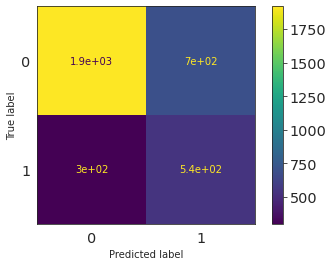

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      2616
           1       0.44      0.64      0.52       837

    accuracy                           0.71      3453
   macro avg       0.65      0.69      0.66      3453
weighted avg       0.76      0.71      0.73      3453
 

AUC-ROC
0.7254232752037822


In [51]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

In [53]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=0.26826957952797276, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix


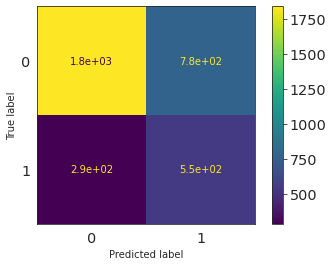

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      2616
           1       0.41      0.66      0.51       837

    accuracy                           0.69      3453
   macro avg       0.64      0.68      0.64      3453
weighted avg       0.76      0.69      0.71      3453
 

AUC-ROC
0.7196724321243411


In [54]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

In [55]:
#MODEL DECISON TREE
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
#Impurity
criterion = ['gini', 'entropy']
#The number of features to consider when looking for the best split
max_features = ['log2', 'sqrt', 'auto']

In [56]:
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_features':max_features,
    'criterion':criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix


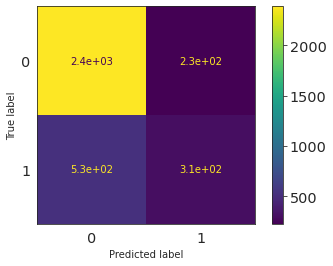

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2616
           1       0.58      0.37      0.45       837

    accuracy                           0.78      3453
   macro avg       0.70      0.64      0.66      3453
weighted avg       0.76      0.78      0.76      3453
 

AUC-ROC
0.7270888823123212


In [57]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

In [58]:
#ADASYN SAMPLING
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix


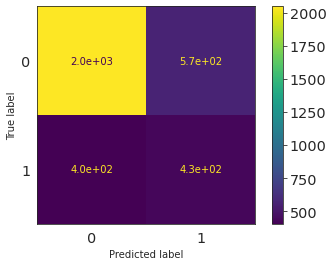

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2616
           1       0.43      0.52      0.47       837

    accuracy                           0.72      3453
   macro avg       0.63      0.65      0.64      3453
weighted avg       0.74      0.72      0.73      3453
 

AUC-ROC
0.6620288163274253


In [59]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

In [60]:
#MODEL RANDOMFOREST
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_features':max_features,
           'criterion':criterion,
           'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion Matrix


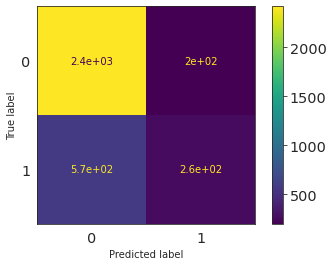

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2616
           1       0.57      0.31      0.40       837

    accuracy                           0.78      3453
   macro avg       0.69      0.62      0.63      3453
weighted avg       0.75      0.78      0.75      3453
 

AUC-ROC
0.7481905304732571


In [61]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

In [62]:
#ADASYN SAMPLING
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion Matrix


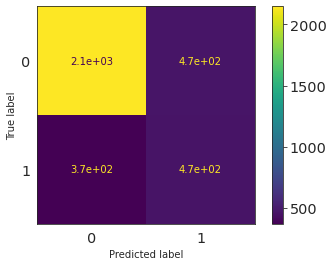

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2616
           1       0.50      0.56      0.53       837

    accuracy                           0.76      3453
   macro avg       0.68      0.69      0.68      3453
weighted avg       0.77      0.76      0.76      3453
 

AUC-ROC
0.7280653199317498


In [63]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix


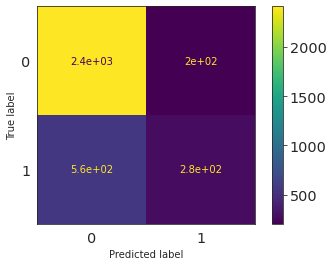

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2616
           1       0.58      0.33      0.42       837

    accuracy                           0.78      3453
   macro avg       0.69      0.63      0.64      3453
weighted avg       0.75      0.78      0.76      3453
 

AUC-ROC
0.7519690883050358


In [64]:
#MODEL ADABOOST
from sklearn.ensemble import AdaBoostClassifier
clf_ada=AdaBoostClassifier()
clf_ada.fit(X_train, y_train)
#Actual data
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'actual')

Confusion Matrix


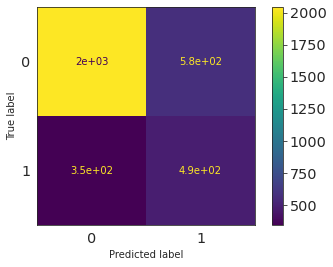

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      2616
           1       0.46      0.59      0.52       837

    accuracy                           0.73      3453
   macro avg       0.66      0.68      0.67      3453
weighted avg       0.76      0.73      0.74      3453
 

AUC-ROC
0.7292089119799487


In [65]:
#Adasyn SAMPLING
clf_ada.fit(X_train_ada, y_train_ada)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'adasyn')

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=cv, scoring='roc_auc',n_jobs=1)

clf_gb.fit(X_train, y_train)
clf_gb.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Confusion Matrix


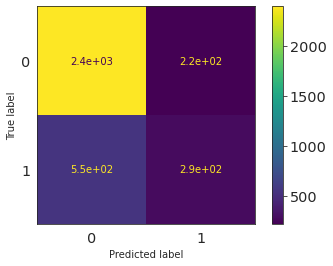

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2616
           1       0.57      0.35      0.43       837

    accuracy                           0.78      3453
   macro avg       0.69      0.63      0.65      3453
weighted avg       0.75      0.78      0.76      3453
 

AUC-ROC
0.7551231005593737


In [67]:
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'actual')

Confusion Matrix


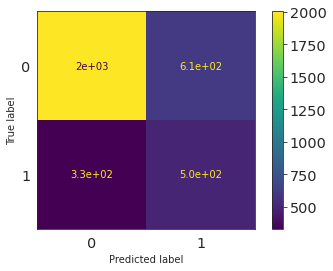

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      2616
           1       0.45      0.60      0.52       837

    accuracy                           0.73      3453
   macro avg       0.65      0.68      0.66      3453
weighted avg       0.76      0.73      0.74      3453
 

AUC-ROC
0.7346763689308328


In [68]:
#Adasyn sampling
clf_gb.fit(X_train_ada, y_train_ada)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'adasyn')

In [72]:
#DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense
# define the keras sequential model
model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# fit the keras model on the dataset
model.fit(X, y, epochs=60, batch_size=29)

Epoch 1/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4682 - accuracy: 0.7853
Epoch 2/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4682 - accuracy: 0.7862
Epoch 3/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7875
Epoch 4/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7865
Epoch 5/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7874
Epoch 6/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4682 - accuracy: 0.7846
Epoch 7/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7868
Epoch 8/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4684 - accuracy: 0.7849
Epoch 9/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7864
Epoch 10/60
596/596 [==============================] - 1s 1ms/step - loss: 0.4681 - accuracy: 0.7870

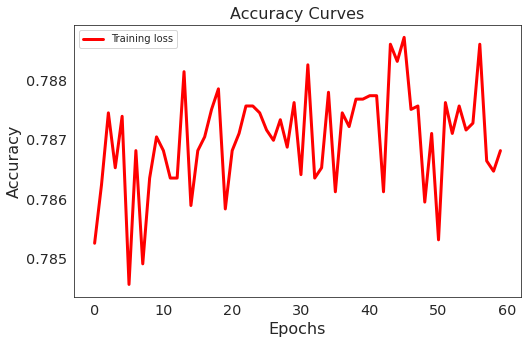

In [77]:
#TITIK OPTIMUM setelah percobaan 150 epoch
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()#EPOCH 60 seharusnya sudah efektif 

In [78]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') 

Accuracy: 79.50
